# Preamble 

In [1]:
import os
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/')

import pickle 
import numpy as np
import matplotlib.pyplot as plt

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble

from importlib import reload
reload(tomo_fncs)
reload(errors)
reload(preamble)

scats = pickle.load(open('mycode/tomo/project1/selection_cats1.p', 'rb') ,encoding='latin1')

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/'

In [6]:
def boot_fnc(dbt, fnc, N=1000):
    results = [] 
    for i in range(N): 
        results.append(fnc(np.random.choice(dbt,len(dbt), replace=True)))
    return results 

In [7]:
def get_error(dbt, fnc, N=1000): 
    results = boot_fnc(dbt, fnc, N)
    return np.std(results)

In [8]:
def cut_both(dbt, cut1, cut2): 
    return dbt[(dbt>=cut1)&(dbt<=cut2)]


def clipped_mean(dbt, p): 
    if p == 0.5: 
        return np.median(dbt)
    
    q1 = np.quantile(dbt, p)
    q2 = np.quantile(dbt, 1-p)
    cut_dbt = cut_both(dbt, q1, q2)
    mean = np.mean(cut_dbt)
    return mean 

def clipped_mean_fnc(p): 
    return lambda dbt: clipped_mean(dbt, p) 

def clipped_dbt(dbt, p): 
    q1 = np.quantile(dbt, p)
    q2 = np.quantile(dbt, 1-p)
    cut_dbt = cut_both(dbt, q1, q2)
    return cubt_dbt 

# 0 < p < 0.5
def clipped_stats(cats, p, param): 
    if p == 0.5: 
        medians = [np.median(cat[param]) for cat in cats]
        return (medians, medians, medians )
    
    q1s = [np.quantile(cat[param], p) for cat in cats] 
    q2s = [np.quantile(cat[param], 1-p) for cat in cats] 
    cut_cats = [cut_both(cat[param], q1, q2) for (cat,q1,q2) in zip(cats, q1s, q2s)]
    means = [np.mean(cat[param]) for cat in cut_cats] 
    mins = [np.min(cat[param]) for cat in cut_cats]
    maxs = [np.max(cat[param]) for cat in cut_cats]
    return means, mins, maxs 
    

def clipped_stat(dbt, p): 
    if p == 0.5: 
        median = np.median(dbt)
        return (median, median, median)
    
    q1 =np.quantile(dbt, p )
    q2 = np.quantile(dbt, 1-p)
    cut_dbt = cut_both(dbt, q1, q2)
    mean = np.mean(cut_dbt)
    my_min = np.min(cut_dbt)
    my_max = np.max(cut_dbt)
    
    return mean, my_min, my_max
    

# def stcd(boot_means, clipped_mean): 
#     return np.sum((boot_means - clipped_mean)**2)
    


# Means 

In [6]:
len(scats)

9

In [7]:
zero_cat = scats[4]

In [15]:
print(np.median(zero_cat['bias_g1']))
print(np.mean(zero_cat['bias_g1']))

print(np.median(scats[8]['bias_g1']))
print(np.mean(scats[8]['bias_g1']))

print()

print(np.median(zero_cat['bias_g1_grp']))
print(np.mean(zero_cat['bias_g1_grp']))

print(np.median(scats[8]['bias_g1_grp']))
print(np.mean(scats[8]['bias_g1_grp']))

2.074546e-08
-0.00050333404
3.8534974e-05
0.0036765877

-1.7578379e-06
0.000104242616
7.524933e-05
-0.07515411


In [9]:
#cuts 
print(np.mean(preamble.abs_cut(zero_cat, 'bias_g1', 1)['bias_g1']))

-0.00043788386


In [17]:
print(np.mean(preamble.abs_cut(scats[8], 'bias_g1_grp', 1)['bias_g1']))
print(np.mean(preamble.abs_cut(scats[8], 'bias_g1_grp', 2)['bias_g1']))

print(np.mean(preamble.abs_cut(scats[8], 'bias_g1_grp', 1)['bias_g1_grp']))
print(np.mean(preamble.abs_cut(scats[8], 'bias_g1_grp', 2)['bias_g1_grp']))


0.0019779745
0.0021758345
0.002062114
0.0022782218


In [7]:
len(scats[4]['bias_g1'])

118946

In [11]:
np.max(scats[4]['bias_g1'])

6.121145

# How symmetric is our distributions? 

In [41]:
def check_symmetric(dbn, N=50): 
    q1s = [] 
    q2s = [] 
    med = np.median(dbn)
    for p in np.linspace(0.01, 0.49, N): 
        q1 = np.quantile(dbn, p)
        q2 = np.quantile(dbn, 1-p)
        q1s.append(med - q1)
        q2s.append(q2 - med)
    
    return q1s, q2s 

def plot_symm(dbn, N=50, log=False): 
    plt.figure()
    q1s, q2s = check_symmetric(dbn, N)
    plt.scatter(q1s, q2s)
    plt.plot(q1s, q1s, color='orange')
    if log==True: 
        plt.xscale("log")
        plt.yscale("log")

In [49]:
np.quantile(scats[4]['bias_g1'], .99)

0.5008802294731141

In [47]:
np.quantile(scats[4]['bias_g1_grp'], .99)

0.5329488784074825

In [40]:
np.percentile?

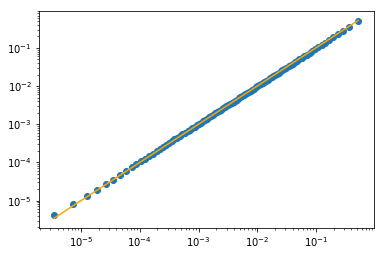

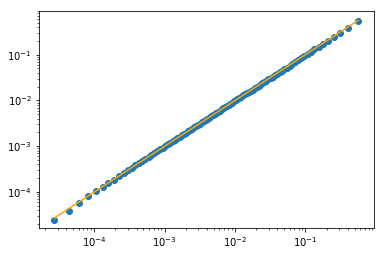

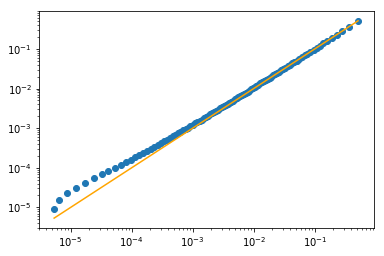

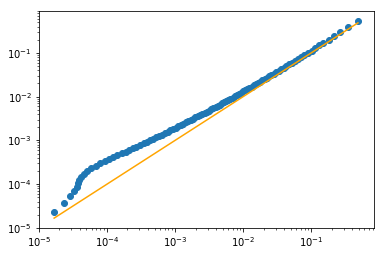

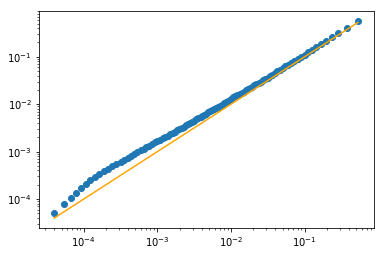

In [42]:
plot_symm(zero_cat['bias_g1'], N =100, log=True )
plot_symm(zero_cat['bias_g1_grp'], N =100, log=True )
plot_symm(scats[5]['bias_g1'], N =100, log=True)
plot_symm(scats[8]['bias_g1'], N =100, log=True )
plot_symm(scats[8]['bias_g1_grp'], N =100, log=True )

# Does a non-symmetric distribution make bootstrapped medians wider?  

In [22]:
np.random.normal(0, 1,10)

array([ 0.0828038 , -0.39684547, -0.00672218, -1.64532063, -0.78717827,
       -1.26354597, -0.24417771,  0.65123949,  1.81605339,  0.03307388])

In [23]:
np.random.choice([1,1,2,32,23],5,replace=False)

array([ 1,  2, 32, 23,  1])

In [186]:
def get_dbt(N, cut): 
    X = np.random.normal(0,1,N*100)
    X = X[X > cut]
    return np.random.choice(X,N, replace=False)


def get_dbt_small(N, cut): 
    X = np.random.normal(0,1,N*100)
    X = X[(X < 0) | (X > cut)]
    return np.random.choice(X,N, replace=False)
    


In [97]:
X1 =get_dbt(int(1e4), -1e10)
X2 =get_dbt(int(1e4), -1)
X3 = get_dbt(int(1e4), 0)




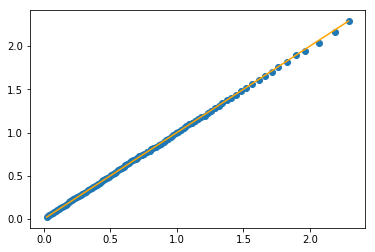

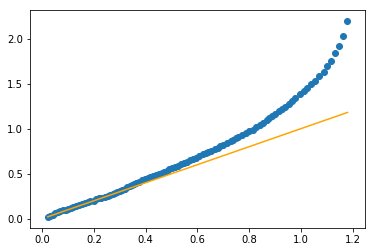

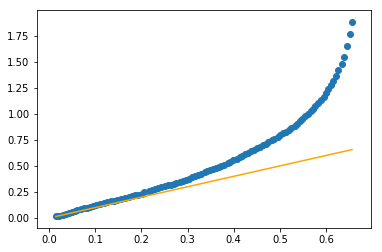

In [82]:
plot_symm(X1, N=100)
plot_symm(X2, N=100)
plot_symm(X3, N=100)

In [78]:
meds1 = boot_medians(X1, np.median, N=int(1e4))
meds2 = boot_medians(X2, np.median, N=int(1e4))
meds3 = boot_medians(X3, np.median, N=int(1e4))

(array([  1.,   0.,   1.,   1.,   0.,   4.,   1.,   0.,   4.,   2.,   3.,
         11.,   8.,  11.,  24.,  21.,  26.,  29.,  29.,  49.,  51.,  62.,
         44., 124.,  87., 119.,  54.,  98., 221., 283.,  15.,  45., 235.,
        166., 166., 133.,  84., 274., 124., 358., 513., 348., 412., 495.,
        172., 239., 445., 324., 301., 393., 407., 439., 176., 120.,  72.,
        266., 258., 272., 281., 146.,  45.,  52.,  98., 151.,  96.,  63.,
         70.,  59.,  41.,  21.,  15.,  22.,  56.,  22.,   6.,  32.,  35.,
         13.,  13.,  10.,  14.,   7.,   2.,   2.,   3.,   1.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([0.34686551, 0.34761267, 0.34835982, 0.34910697, 0.34985413,
        0.35060128, 0.35134844, 0.35209559, 0.35284274, 0.3535899 ,
        0.35433705, 0.3550842 , 0.35583136, 0.35657851, 0.35732567,
        0.35807282, 0.35881997, 0.35956713, 0.36031428, 0.36106143,
        0.36180859, 0.36255574, 0.3633029 , 0.

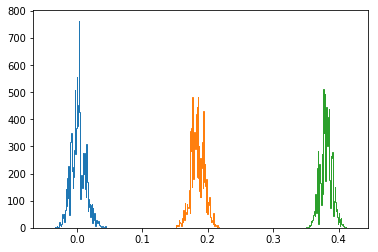

In [79]:
plt.hist(meds1, histtype='step', bins=100)
plt.hist(meds2, histtype='step', bins=100)
plt.hist(meds3, histtype='step', bins=100)

In [80]:
print(np.std(meds1))
print(np.std(meds2))
print(np.std(meds3))

0.011248241693750792
0.010584003495699407
0.009198741270053845


## Maybe if non-symmetric around small?

In [122]:
X1 =get_dbt_small(int(1e4), 0)
X2 =get_dbt_small(int(1e4), 0.05)
X3 =get_dbt_small(int(1e4), 1)






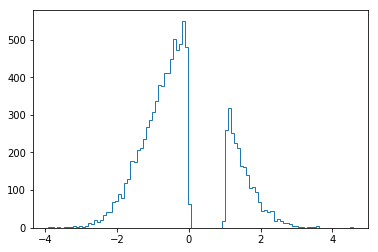

In [123]:
plt.hist(X3, histtype='step', bins=100)
print()

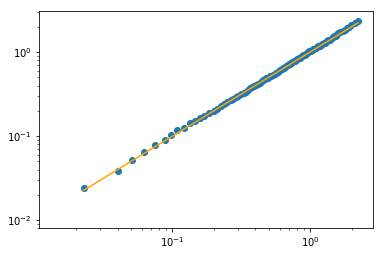

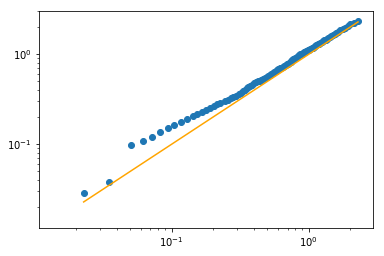

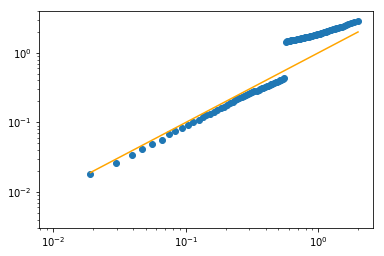

In [124]:
plot_symm(X1, N=100,log=True)
plot_symm(X2, N=100, log=True)
plot_symm(X3, N=100,log=True)

In [125]:
meds1 = boot_medians(X1, np.median, N=int(1e4))
meds2 = boot_medians(X2, np.median, N=int(1e4))
meds3 = boot_medians(X3, np.median, N=int(1e4))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,
          1.,   2.,   0.,   2.,   3.,   3.,   4.,   2.,  13.,   6.,  13.,
          6.,  21.,  25.,  16.,   4.,  62.,  36.,  36.,  24.,  61.,  59.,
         90.,  39.,  36.,  96.,  68., 106.,  81., 205., 190.,  74., 113.,
        154., 102., 209., 247., 185., 330., 267., 316.,  69., 753., 183.,
        654., 515., 323., 124., 176., 154., 124., 374., 367., 445., 358.,
        202., 271.,  50.,  93., 201., 192., 101.,  88.,  49.,  77., 151.,
        171., 105.,  50.,  39.,  54.,  34.,  26.,  41.,   3.,  18.,   7.,
         13.,   7.,  11.,   0.,   5.,   4.,   2.,   2.,   1.,   0.,   0.,
          2.]),
 array([-0.48274135, -0.48202577, -0.48131019, -0.4805946 , -0.47987902,
        -0.47916344, -0.47844785, -0.47773227, -0.47701668, -0.4763011 ,
        -0.47558552, -0.47486993, -0.47415435, -0.47343877, -0.47272318,
        -0.4720076 , -0.47129202, -0.47057643, -0.46986085, -0.46914526,
        -0.46842968, -0.46

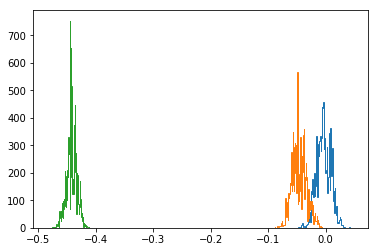

In [126]:
plt.hist(meds1, histtype='step', bins=100)
plt.hist(meds2, histtype='step', bins=100)
plt.hist(meds3, histtype='step', bins=100)

In [127]:
print(np.std(meds1))
print(np.std(meds2))
print(np.std(meds3))

0.012368171518496451
0.012868287406106146
0.008999965739268912


# What do the outliers look like 

In [148]:
bad_cat1 = zero_cat[np.absolute(zero_cat['bias_g1']) > 1 ]
bad_cat2 = zero_cat[np.absolute(zero_cat['bias_g1_grp']) > 1 ]

(0.2, 5)

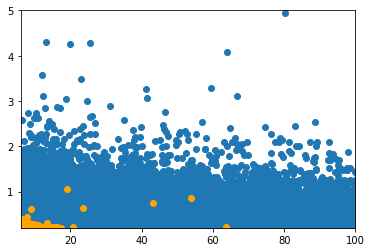

In [150]:
plt.scatter(zero_cat['snr_grpf'], zero_cat['sigma_m'])
plt.scatter(bad_cat1['snr_grpf'], bad_cat1['sigma_m'], color= 'red')
plt.scatter(bad_cat2['snr_grpf'], bad_cat2['sigma_m'], color= 'orange')





plt.xlim(6, 100)
plt.ylim(0.2, 5)



In [143]:
len(bad_cat)

936

# (Order) Multiplicative bias on cut cats? 

In [27]:
g1s = [-.015,-.01,-.005,0.,.005,.01,.015]

In [77]:
cut_cats = [cat[np.absolute(cat['bias_g1_grp']) < 0.55] for cat in scats ]

In [68]:
 cut_cats = [cut_both(cat, 'bias_g1_grp', np.quantile(cat['bias_g1_grp'], .01), np.quantile(cat['bias_g1_grp'], 0.99)) for cat in scats] 

In [78]:
cut_cats = preamble.get_intersection_cats(cut_cats)

In [79]:
[len(cat)for cat in cut_cats]

[116395, 116395, 116395, 116395, 116395, 116395, 116395, 116395, 116395]

In [80]:
np.max(cut_cats[4]['bias_g1_grp'])

0.5280617

In [81]:
fcut_cats = cut_cats

In [82]:
[len(cat) for cat in fcut_cats]

[116395, 116395, 116395, 116395, 116395, 116395, 116395, 116395, 116395]

In [87]:
means_iso = [np.median(cat['bias_g1']) for cat in fcut_cats]
means_grp = [np.median(cat['bias_g1_grp']) for cat in fcut_cats]

In [88]:
print(means_iso)
print(means_grp)

[-3.608373e-05, -2.296608e-05, -1.2208913e-05, -4.1986177e-06, 4.9720867e-08, 5.955988e-06, 1.4367488e-05, 2.5806054e-05, 3.907195e-05]
[-7.629135e-05, -5.2877716e-05, -3.4159275e-05, -1.7052555e-05, -1.1528958e-06, 1.3598258e-05, 3.12069e-05, 5.282538e-05, 7.6542434e-05]


In [185]:
#fit 
m,b = np.polyfit(g1s, means_iso, 1)
print(m,b)
m,b = np.polyfit(g1s, means_grp, 1)
print(m,b)


0.15808627254695504 -0.00035439151023248513
0.16726846307782192 -0.0003930068466745851


In [ ]:
### a lot bigger. 

# Means of means 

## Iso 

In [19]:
cut_cats = [cat[np.absolute(cat['bias_g1_grp']) < 1] for cat in scats ]
len(cut_cats)

9

In [20]:
means1 = boot_fnc(cut_cats[4]['bias_g1'], np.mean, N=int(1e4))
means2 = boot_fnc(cut_cats[8]['bias_g1'], np.mean, N=int(1e4))

NameError: name 'boot_fnc' is not defined

In [235]:
means1_all = boot_fnc(zero_cat['bias_g1'], np.mean, N=int(1e4))
means2_all = boot_fnc(scats[8]['bias_g1'], np.mean, N=int(1e4))

In [236]:
meds1 = boot_fnc(cut_cats[4]['bias_g1'], np.median, N=int(1e4))
meds2 = boot_fnc(cut_cats[8]['bias_g1'], np.median, N=int(1e4))

In [237]:
meds1_all = boot_medians(zero_cat['bias_g1'], np.median, N=int(1e4))
meds2_all = boot_medians(scats[8]['bias_g1'], np.median, N=int(1e4))

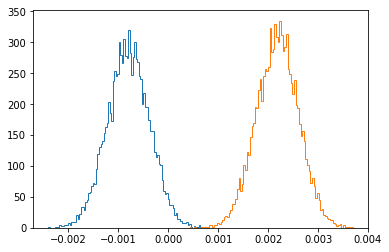

In [238]:
plt.hist(means1, histtype='step', bins=100)
plt.hist(means2, histtype='step', bins=100)
print()

In [239]:
print(np.mean(means1))
print(np.mean(means2))

print(np.std(means1))
print(np.std(means2))

-0.000805336
0.002177252
0.00042551808
0.0004234345


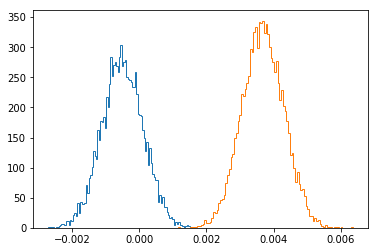

In [240]:
plt.hist(means1_all, histtype='step', bins=100)
plt.hist(means2_all, histtype='step', bins=100)
print()

In [241]:
print(np.mean(means1_all))
print(np.mean(means2_all))

print(np.std(means1_all))
print(np.std(means2_all))

-0.00050908566
0.0036746678
0.0006166536
0.0006216452


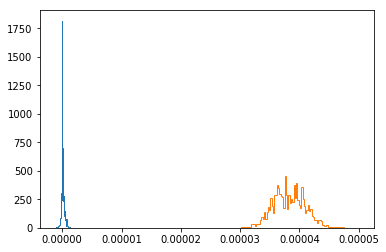

In [242]:
plt.hist(meds1, histtype='step', bins=100)
plt.hist(meds2, histtype='step', bins=100)
print()

In [243]:
print(np.std(meds1))
print(np.std(meds2))

2.4515563e-07
2.7147319e-06


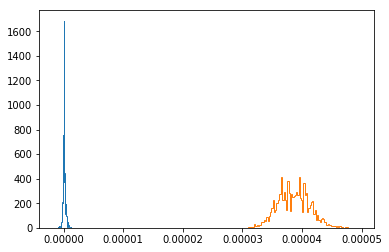

In [244]:
plt.hist(meds1_all, histtype='step', bins=100)
plt.hist(meds2_all, histtype='step', bins=100)
print()

In [245]:
print(np.std(meds1_all))
print(np.std(meds2_all))

2.442562e-07
2.722206e-06


# Clipped means as a function of quantiles 

In [49]:
cat = scats[8]
dbt = cat['bias_g1']

In [50]:
fcmeans = [] 
fmaxs = [] 
fmins = []
fdists1 = []
fdists2 = [] 
ps = np.linspace(0, 0.5, 51)

In [51]:
for p in ps:  
    cmean, my_min, my_max = clipped_stat(dbt, p)
    fcmeans.append(cmean)
    fmins.append(my_min)
    fmaxs.append(my_max)
    fdists1.append(np.median(dbt) - my_min)
    fdists2.append(my_max - np.median(dbt))

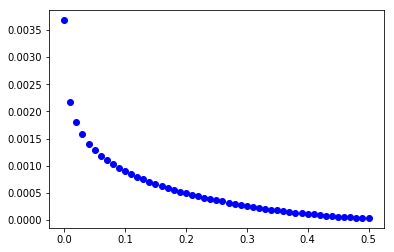

In [126]:
plt.plot(ps, fcmeans, 'bo')

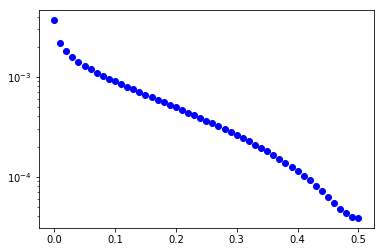

In [24]:
plt.plot(ps, np.absolute(fcmeans), 'bo')
plt.yscale('log')

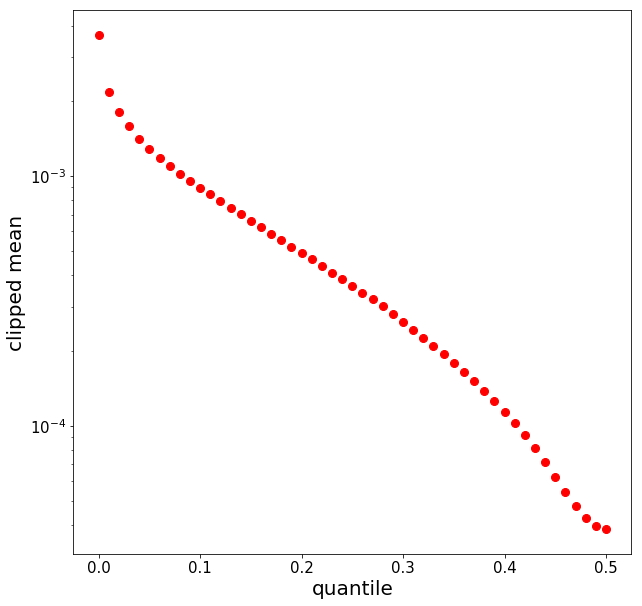

In [52]:
plt.figure(figsize=(10,10))

for p, fcmean in zip(ps, fcmeans): 
    if fcmean > 0:
        plt.plot(p, fcmean, 'ro', markersize=8)
    else: 
        plt.plot(p, np.absolute(fcmean), "o", markerfacecolor='None', color='r', markersize=8)
        
        
plt.ylabel('clipped mean', size=20)


plt.xlabel('quantile', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')

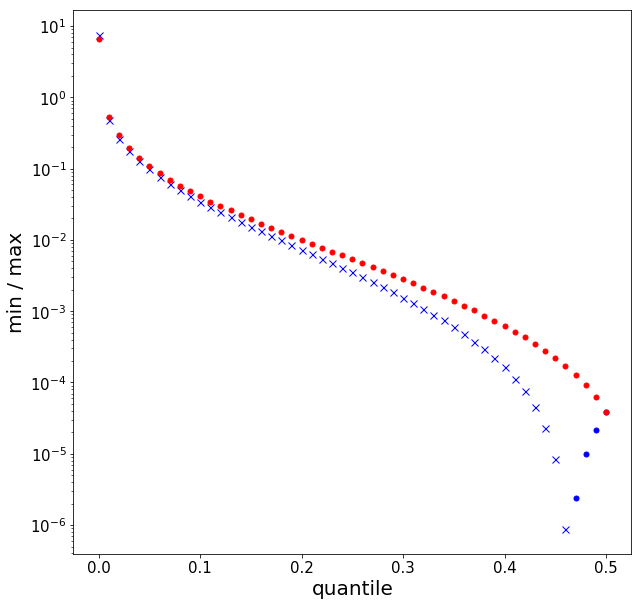

In [53]:
plt.figure(figsize=(10,10))

for p, fmin,fmax in zip(ps,fmins, fmaxs):
    if fmin > 0 : 
        plt.plot(p, fmin, 'bo', markersize =5)
    else: 
        plt.plot(p, np.absolute(fmin), "bx", markersize =7)
        
    if fmax > 0: 
        plt.plot(p, fmax, 'ro', markersize =5)
    
    else:
         plt.plot(p, np.absolute(fmax), "rx", markersize =7)
    
    
plt.xlabel('quantile', size=20)
plt.ylabel('min / max', size =20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.tick_params(axis='y', which='minor')

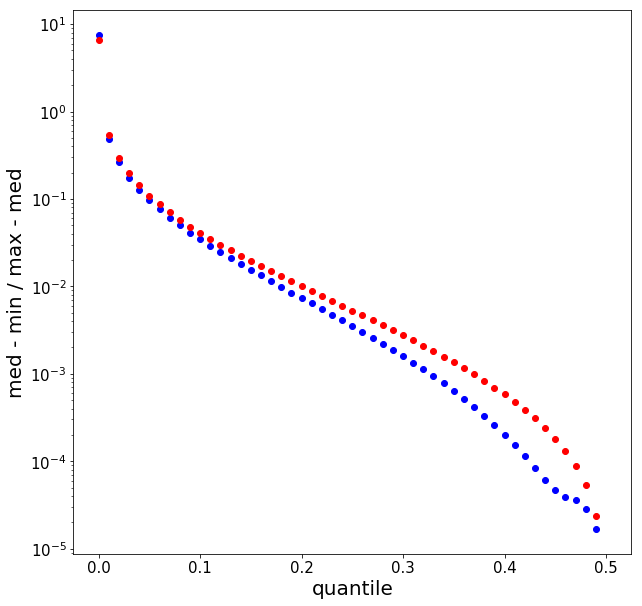

In [54]:
plt.figure(figsize=(10,10))

plt.plot(ps, fdists1, 'bo')
plt.plot(ps, fdists2, 'ro')


    
plt.xlabel('quantile', size=20)
plt.ylabel('med - min / max - med', size =20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.tick_params(axis='both', which='minor')

## Look at some errors

In [9]:
dbt1 = scats[4]['bias_g1']
dbt2 = scats[8]['bias_g1']
ps = np.linspace(0, 0.5, 51)

In [10]:
means1 = [] 
errors1 = [] 
means2 = [] 
errors2 = [] 

In [11]:
from tqdm import tqdm 

In [12]:
for p in tqdm(ps): 
    means1.append(clipped_mean(dbt1, p))
    errors1.append(get_error(dbt1, clipped_mean_fnc(p), N=1000))
    
    means2.append(clipped_mean(dbt2, p))
    errors2.append(get_error(dbt2, clipped_mean_fnc(p), N=1000))

100%|██████████| 51/51 [08:57<00:00,  8.91s/it]


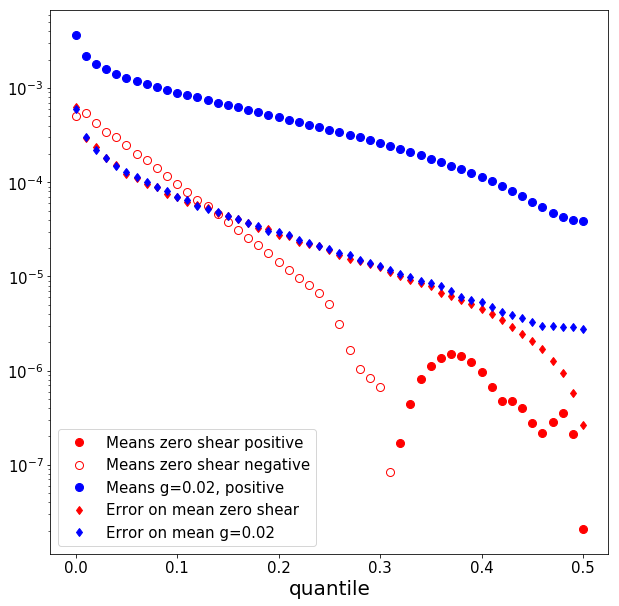

In [34]:
plt.figure(figsize=(10,10))

for p, mean in zip(ps, means1): 
    if mean > 0:
        red_dot_fill, = plt.plot(p, mean, 'ro', markersize=8)
    else: 
        red_dot_nofill, = plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='r', markersize=8)
        


for p, mean in zip(ps, means2): 
    if mean > 0:
        blue_dot, = plt.plot(p, mean, 'bo', markersize=8)
    else: 
        plt.plot(p, np.absolute(mean), 'bx', markersize=8)
        

        
red_diamonds, = plt.plot(ps, errors1, 'rd', label= 'error of mean g=0')
blue_diamonds, = plt.plot(ps, errors2, 'bd', label= 'error of means g=0.02')

plt.legend([red_dot_fill, red_dot_nofill, blue_dot, red_diamonds, blue_diamonds], 
           ["Means zero shear positive", "Means zero shear negative", "Means g=0.02, positive", "Error on mean zero shear", "Error on mean g=0.02"], prop={"size":15})

        
plt.xlabel('quantile', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')

In [133]:
errors[-1]

2.5220675e-07

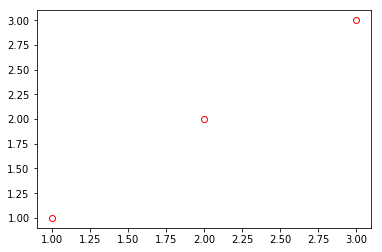

In [31]:
plt.plot([1,2,3], [1,2,3], "o", markerfacecolor='None', color='r')

# Weighting schemes 

## Bias iso vs Bias grp with group color 

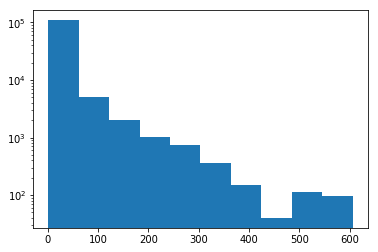

In [22]:
plt.hist(cat['grp_size'])
plt.yscale('log')

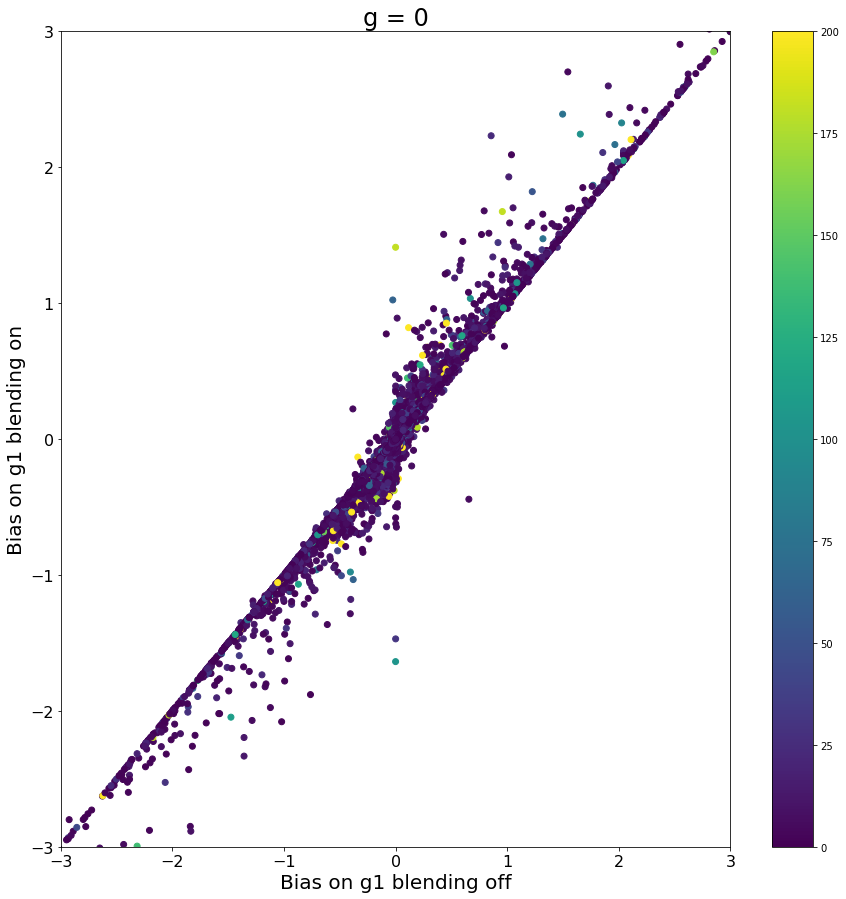

In [39]:
# g = 0 
plt.figure(figsize=(15,15))
cat = scats[4]
plt.scatter(cat['bias_g1'], cat['bias_g1_grp'], c=cat['grp_size'], vmin=0, vmax=200)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("g = 0", size= 24)
plt.xlabel('Bias on g1 blending off', size=20)
plt.ylabel('Bias on g1 blending on', size=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.colorbar() 

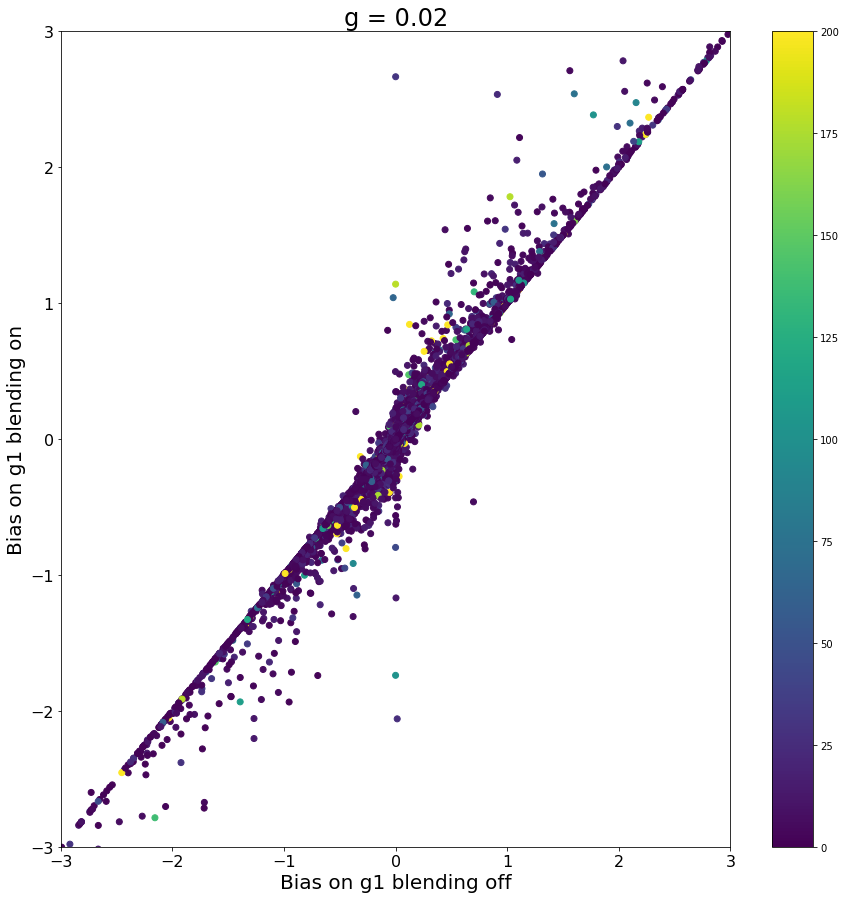

In [40]:
# g = 0.02
plt.figure(figsize=(15,15))
cat = scats[8]
plt.scatter(cat['bias_g1'], cat['bias_g1_grp'], c=cat['grp_size'], vmin=0, vmax=200)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("g = 0.02", size= 24)
plt.xlabel('Bias on g1 blending off', size=20)
plt.ylabel('Bias on g1 blending on', size=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.colorbar() 

## Scatter plots with weights 

In [41]:
shape_noise = np.std(np.sqrt(scats[4]['e1']**2 + scats[4]['e2']**2))

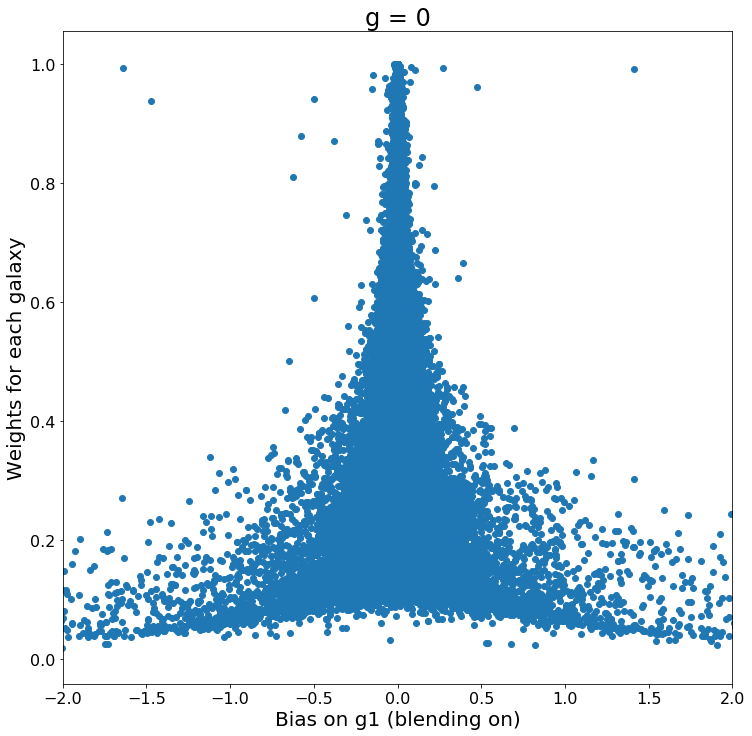

In [57]:
# g = 0 , g1 component. 
plt.figure(figsize=(12,12))
cat = scats[4]
weights = (1./2)*(shape_noise**2/ (shape_noise**2 + cat['dg1_grp']**2) + shape_noise**2/ (shape_noise**2 + cat['dg2_grp']**2))
plt.scatter(cat['bias_g1_grp'], weights)
plt.title("g = 0", size= 24)
plt.xlabel('Bias on g1 (blending on)', size=20)
plt.ylabel('Weights for each galaxy', size=20)
plt.xlim(-2, 2)
plt.tick_params(axis='both', which='major', labelsize=16)

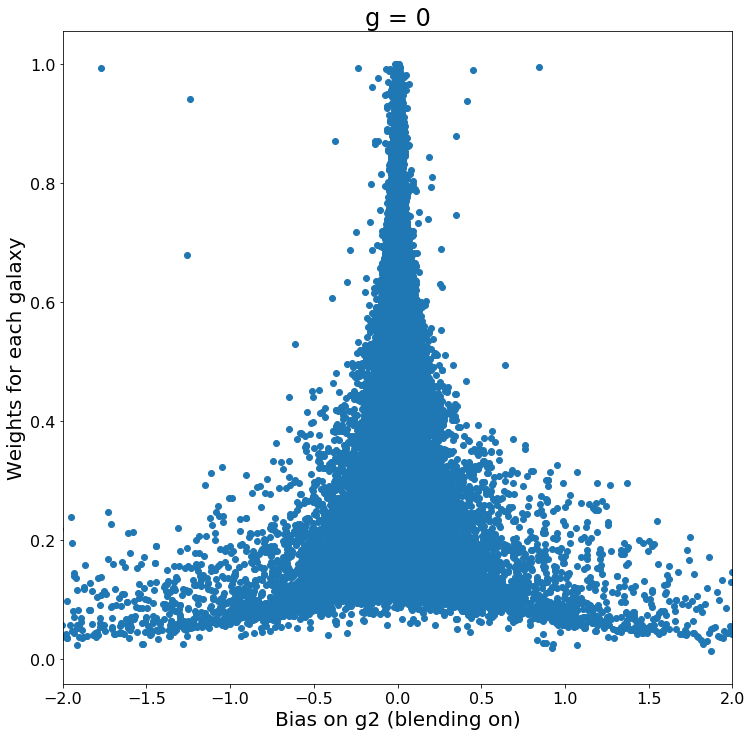

In [58]:
# g = 0 , g2 component. 
plt.figure(figsize=(12,12))
cat = scats[4]
weights = (1./2)*(shape_noise**2/ (shape_noise**2 + cat['dg1_grp']**2) + shape_noise**2/ (shape_noise**2 + cat['dg2_grp']**2))
plt.scatter(cat['bias_g2_grp'], weights)
plt.title("g = 0", size= 24)
plt.xlabel('Bias on g2 (blending on)', size=20)
plt.xlim(-2, 2)
plt.ylabel('Weights for each galaxy', size=20)
plt.tick_params(axis='both', which='major', labelsize=16)

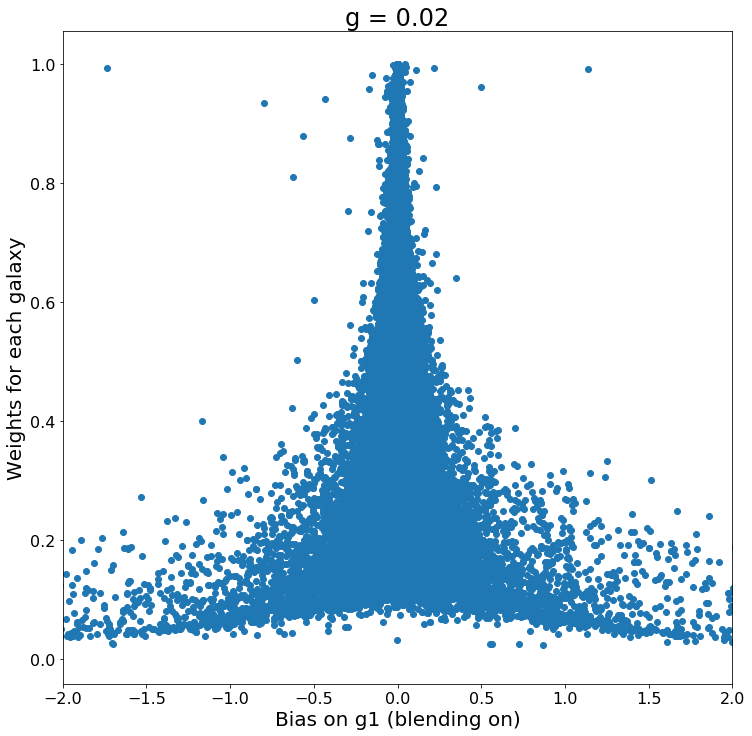

In [59]:
# g = 0.02 , g1 component. 
plt.figure(figsize=(12,12))
cat = scats[8]
weights = (1./2)*(shape_noise**2/ (shape_noise**2 + cat['dg1_grp']**2) + shape_noise**2/ (shape_noise**2 + cat['dg2_grp']**2))
plt.scatter(cat['bias_g1_grp'], weights)
plt.title("g = 0.02", size= 24)
plt.xlabel('Bias on g1 (blending on)', size=20)
plt.ylabel('Weights for each galaxy', size=20)
plt.xlim(-2, 2)
plt.tick_params(axis='both', which='major', labelsize=16)

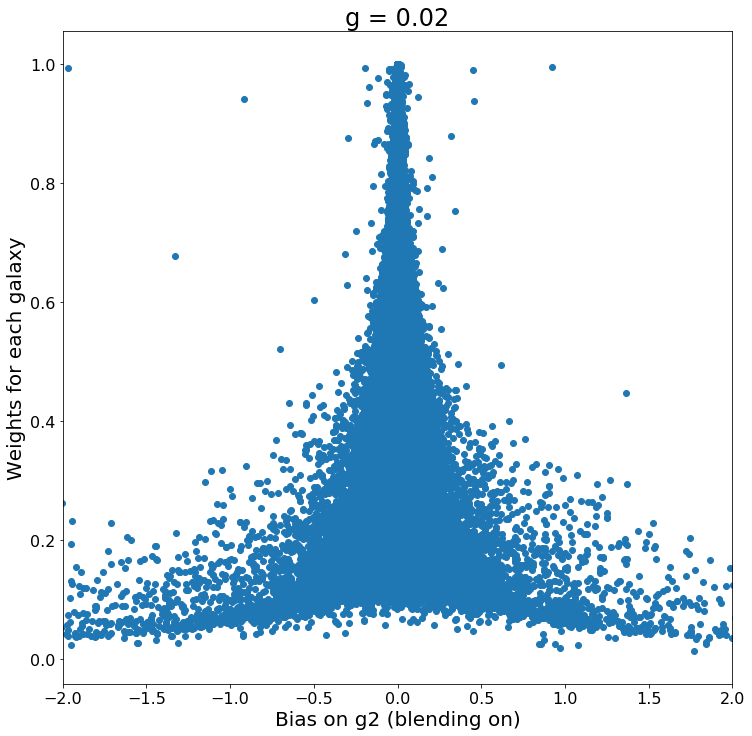

In [60]:
# g = 0.02 , g1 component. 
plt.figure(figsize=(12,12))
cat = scats[8]
weights = (1./2)*(shape_noise**2/ (shape_noise**2 + cat['dg1_grp']**2) + shape_noise**2/ (shape_noise**2 + cat['dg2_grp']**2))
plt.scatter(cat['bias_g2_grp'], weights)
plt.title("g = 0.02", size= 24)
plt.xlabel('Bias on g2 (blending on)', size=20)
plt.ylabel('Weights for each galaxy', size=20)
plt.xlim(-2, 2)
plt.tick_params(axis='both', which='major', labelsize=16)